# **PRODUCT RECOMMENDATION SYSTEM**

## IMPORTING LIBRARIES

## Download csv file from https://drive.google.com/file/d/10dG5E4_M3R9DnHkz3F02hKARAnzncwbp/view?usp=sharing

**download rating_Electorincs.zip file from link above and unzip it and move rating_Electorincs.csv file from rating_Electorincs folder to project directory.**

In [1]:
import random

# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas import read_csv


import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

# EDA - Exploratory Data Analysis

Analyse Data  on the basis of:-

- datatype

- shape (row * col)



Check Summary for:-

- rating distribution.

- number of users and products.

In [72]:
#IMPORTING DATASET
#Download csv file from https://drive.google.com/file/d/10dG5E4_M3R9DnHkz3F02hKARAnzncwbp/view?usp=sharing
df = read_csv("./ratings_Electronics.csv", parse_dates=["timestamp"]) #Treat timestamp column as Date
#Trimming Dataset Randomly with 10000 for Sample Test
# df = df.sample(10000)
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms')
df.shape
df.describe()
df.info()
df.head()
#Unique List of product ids
products = set(df["product_id"])
len(products)
# df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346246 entries, 0 to 6346245
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     object        
 1   product_id  object        
 2   ratings     float64       
 3   timestamp   datetime64[ns]
 4   location    object        
 5   category    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 290.5+ MB


,user_id,product_id,ratings,timestamp,location,category
0,AKM1MP6P0OYPR,0132793040,5.0,1970-01-16 19:23:31.200,Delhi,grocery
1,A2CX7LUOHB2NDG,0321732944,5.0,1970-01-16 12:31:40.800,Roorkee,dairy
2,A2NWSAGRHCP8N5,0439886341,1.0,1970-01-16 19:46:33.600,Bengaluru,medical
3,A2WNBOD3WNDNKT,0439886341,3.0,1970-01-16 21:47:31.200,Bengaluru,beauty
4,A1GI0U4ZRJA8WN,0439886341,1.0,1970-01-16 10:45:07.200,Kolkata,stationary
...,...,...,...,...,...,...
6346241,A12WGI01EP0VKJ,B008R77ZCO,5.0,1970-01-16 16:45:07.200,Roorkee,dairy
6346242,AHMP0U01GCYOJ,B008R77ZCO,4.0,1970-01-17 02:16:48.000,Chennai,grocery
6346243,A19FECTP4RQ2CL,B008R77ZCO,5.0,1970-01-16 17:47:02.400,Kolkata,grocery
6346244,AQPIWE6432PMP,B008R77ZCO,5.0,1970-01-16 21:56:09.600,Pune,sport


# Rating Distribution

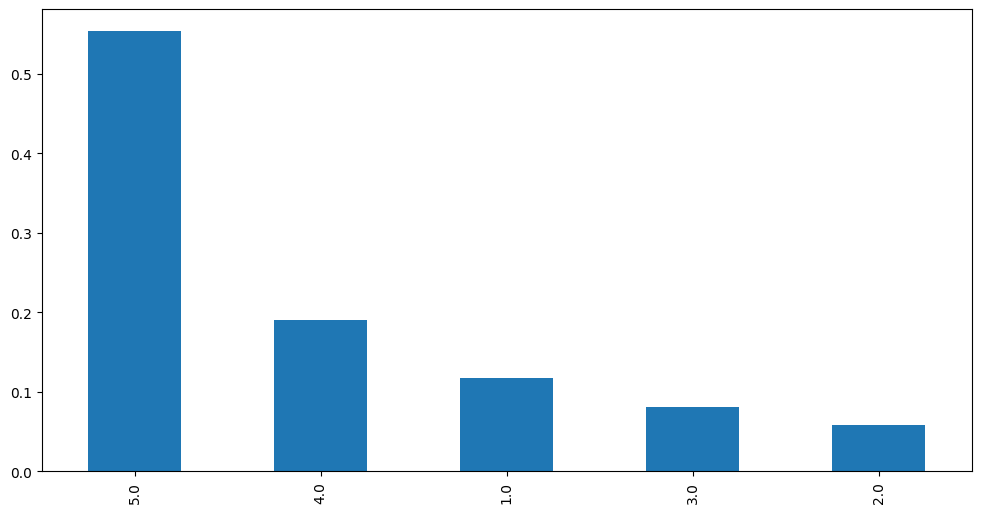

In [73]:
plt.figure(figsize = (12,6))
df['ratings'].value_counts(1).plot(kind='bar')
plt.show()

# **DATA PREPROCESSING**

In [4]:
df.groupby("product_id").mean()
product_wise = df.groupby("product_id").mean()
product_wise.reset_index(inplace=True)
product_wise_dict = {key: value for key, value in zip(product_wise["product_id"], product_wise["ratings"])}
product_wise_dict


{'0132793040': 5.0,
 '0321732944': 5.0,
 '0439886341': 1.6666666666666667,
 '0511189877': 4.5,
 '0528881469': 2.8518518518518516,
 '0558835155': 3.0,
 '059400232X': 5.0,
 '0594012015': 2.0,
 '0594017343': 1.0,
 '0594017580': 3.0,
 '0594033896': 4.4,
 '0594033926': 4.533333333333333,
 '0594033934': 5.0,
 '0594202442': 4.0,
 '0594287995': 5.0,
 '0594296420': 4.666666666666667,
 '0594450209': 5.0,
 '0594450705': 5.0,
 '0594451647': 4.357142857142857,
 '0594477670': 4.666666666666667,
 '0594478162': 4.0,
 '0594481813': 4.225806451612903,
 '0594481902': 4.384615384615385,
 '0594482127': 4.0,
 '0594511488': 5.0,
 '0594514681': 4.5,
 '0594514789': 5.0,
 '0594549507': 4.0,
 '0594549558': 5.0,
 '0743610431': 4.0,
 '0777700018': 5.0,
 '0840017677': 4.0,
 '0879393742': 4.0,
 '089933623X': 2.5,
 '0899336795': 1.6,
 '094339676X': 5.0,
 '0970407998': 3.2,
 '0970408005': 4.0,
 '0972683275': 4.470980019029496,
 '0977703037': 4.0,
 '0978770382': 3.5,
 '0979526191': 3.55,
 '0983947600': 3.66666666666666

### Checking the density of the rating matrix

# **ADDING AN NEW COLUMN OF AVERAGE RATING**

In [5]:
type(product_wise_dict)
len(product_wise_dict)
df["average_rating"] = df["product_id"].map(product_wise_dict)
df

,user_id,product_id,ratings,timestamp,location,category,average_rating
0,AKM1MP6P0OYPR,0132793040,5.0,1970-01-16 19:23:31.200,Delhi,grocery,5.000000
1,A2CX7LUOHB2NDG,0321732944,5.0,1970-01-16 12:31:40.800,Roorkee,dairy,5.000000
2,A2NWSAGRHCP8N5,0439886341,1.0,1970-01-16 19:46:33.600,Bengaluru,medical,1.666667
3,A2WNBOD3WNDNKT,0439886341,3.0,1970-01-16 21:47:31.200,Bengaluru,beauty,1.666667
4,A1GI0U4ZRJA8WN,0439886341,1.0,1970-01-16 10:45:07.200,Kolkata,stationary,1.666667
...,...,...,...,...,...,...,...
2465299,A1A908LCVNJR5S,B0027FGW3K,5.0,1970-01-17 03:47:31.200,Pune,grocery,3.503943
2465300,A1X1SF1H5CP38M,B0027FGW3K,1.0,1970-01-17 06:10:04.800,Kolkata,sport,3.503943
2465301,A1OQC5LHHM8Y30,B0027FGW3K,5.0,1970-01-16 18:05:45.600,Mumbai,beauty,3.503943
2465302,A21AYKD7KSHHD5,B0027FGW3K,4.0,1970-01-16 23:02:24.000,Hyderabad,sport,3.503943


In [6]:
len(product_wise_dict)

135685

In [7]:
df["average_rating"] = df["product_id"].map(product_wise_dict)
df

,user_id,product_id,ratings,timestamp,location,category,average_rating
0,AKM1MP6P0OYPR,0132793040,5.0,1970-01-16 19:23:31.200,Delhi,grocery,5.000000
1,A2CX7LUOHB2NDG,0321732944,5.0,1970-01-16 12:31:40.800,Roorkee,dairy,5.000000
2,A2NWSAGRHCP8N5,0439886341,1.0,1970-01-16 19:46:33.600,Bengaluru,medical,1.666667
3,A2WNBOD3WNDNKT,0439886341,3.0,1970-01-16 21:47:31.200,Bengaluru,beauty,1.666667
4,A1GI0U4ZRJA8WN,0439886341,1.0,1970-01-16 10:45:07.200,Kolkata,stationary,1.666667
...,...,...,...,...,...,...,...
2465299,A1A908LCVNJR5S,B0027FGW3K,5.0,1970-01-17 03:47:31.200,Pune,grocery,3.503943
2465300,A1X1SF1H5CP38M,B0027FGW3K,1.0,1970-01-17 06:10:04.800,Kolkata,sport,3.503943
2465301,A1OQC5LHHM8Y30,B0027FGW3K,5.0,1970-01-16 18:05:45.600,Mumbai,beauty,3.503943
2465302,A21AYKD7KSHHD5,B0027FGW3K,4.0,1970-01-16 23:02:24.000,Hyderabad,sport,3.503943


In [8]:
df.groupby("product_id").count()

,user_id,ratings,timestamp,location,category,average_rating
product_id,,,,,,
0132793040,1,1,1,1,1,1
0321732944,1,1,1,1,1,1
0439886341,3,3,3,3,3,3
0511189877,6,6,6,6,6,6
0528881469,27,27,27,27,27,27
...,...,...,...,...,...,...
B0027FDZ6M,1,1,1,1,1,1
B0027FFQ8M,12,12,12,12,12,12
B0027FFR90,137,137,137,137,137,137



# **ADDING A NEW COLUMN OF COUNT OF RATING PRODUCT HAS**

In [ ]:
product_wise = df.groupby("product_id").count()
product_wise.reset_index(inplace=True)
product_wise_dict = {key: value for key, value in zip(product_wise["product_id"], product_wise["ratings"])}
product_wise_dict

In [10]:
df["rating_count"] = df["product_id"].map(product_wise_dict)
df

,user_id,product_id,ratings,timestamp,location,category,average_rating,rating_count
0,AKM1MP6P0OYPR,0132793040,5.0,1970-01-16 19:23:31.200,Delhi,grocery,5.000000,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1970-01-16 12:31:40.800,Roorkee,dairy,5.000000,1
2,A2NWSAGRHCP8N5,0439886341,1.0,1970-01-16 19:46:33.600,Bengaluru,medical,1.666667,3
3,A2WNBOD3WNDNKT,0439886341,3.0,1970-01-16 21:47:31.200,Bengaluru,beauty,1.666667,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,1970-01-16 10:45:07.200,Kolkata,stationary,1.666667,3
...,...,...,...,...,...,...,...,...
2465299,A1A908LCVNJR5S,B0027FGW3K,5.0,1970-01-17 03:47:31.200,Pune,grocery,3.503943,1268
2465300,A1X1SF1H5CP38M,B0027FGW3K,1.0,1970-01-17 06:10:04.800,Kolkata,sport,3.503943,1268
2465301,A1OQC5LHHM8Y30,B0027FGW3K,5.0,1970-01-16 18:05:45.600,Mumbai,beauty,3.503943,1268
2465302,A21AYKD7KSHHD5,B0027FGW3K,4.0,1970-01-16 23:02:24.000,Hyderabad,sport,3.503943,1268


# **Taking a subset of data having**

- avegage rating > 2
- rating count > 30
- user with given ratings >= 50

In [11]:
df = df[(df.average_rating >2) & (df.rating_count > 30)].reset_index()
counts = df['user_id'].value_counts()
df = df[df['user_id'].isin(counts[counts >= 50].index)]

In [12]:
df = df.drop(columns=["rating_count"])

In [13]:
df

,index,user_id,product_id,ratings,timestamp,location,category,average_rating
1879,2162,A5JLAU2ARJ0BO,1400532655,1.0,1970-01-15 22:42:14.400,Patna,grocery,3.727273
4921,7748,A680RUE1FDO8B,B000001OMI,5.0,1970-01-15 05:02:24.000,Gangtok,stationary,3.788462
5158,8147,A1T1YSCDW0PD25,B00000DM9W,5.0,1970-01-13 23:58:33.600,Roorkee,grocery,4.593373
5263,8252,ABVYGB2TKBO8F,B00000DM9W,5.0,1970-01-13 19:01:55.200,Patna,stationary,4.593373
5361,8350,A3NCIN6TNL0MGA,B00000DM9W,5.0,1970-01-14 12:08:38.400,Hyderabad,dairy,4.593373
...,...,...,...,...,...,...,...,...
1843017,2459398,A2XRMQA6PJ5ZJ8,B002771V48,5.0,1970-01-15 21:04:19.200,Delhi,medical,3.488746
1844390,2461079,A250AXLRBVYKB4,B0027AGK3M,5.0,1970-01-15 14:02:24.000,Delhi,medical,4.167939
1844446,2461135,A31N0XY2UTB25C,B0027AGK3M,4.0,1970-01-15 23:15:21.600,Bengaluru,stationary,4.167939
1845741,2462665,A15QYHQH80W30L,B0027CTQC2,5.0,1970-01-15 18:50:24.000,Chennai,beauty,4.476534


In [15]:
final_ratings_matrix = df[['user_id','product_id','ratings']].pivot(index = 'user_id', columns ='product_id', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

final_ratings_matrix = df.pivot(index = 'user_id', columns ='product_id', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

density = (given_num_of_ratings/possible_num_of_ratings)

density *= 100

print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (61, 3095)
possible_num_of_ratings =  188795
given_num_of_ratings =  4636
Shape of final_ratings_matrix:  (61, 3095)
density: 2.46%


product_id,1400532655,B000001OMI,B00000DM9W,B00000J05A,B00000J061,B00000J08C,B00000J1EP,B00000J1EQ,B00000J1UQ,B00000J1V5,...,B0026RHPSU,B0026RHUNK,B0026T3TJM,B0026ZPFCK,B00275XTSQ,B00276S5F2,B002771V48,B0027AGK3M,B0027CTQC2,B0027FGW3K
user_id,,,,,,,,,,,,,,,,,,,,,
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A17HMM1M7T9PJ1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **RECOMMENDING THE TOP 10 RATED ITEM ON THE BASIS OF AVERAGE RATING**

In [16]:
def top_n(df, n):
    sorted_by_rating = df.sort_values(by=["average_rating"], ascending=False)
    sorted_by_rating = sorted_by_rating.drop_duplicates(["product_id"])
    top_products_list = list(sorted_by_rating.product_id)
    top_10_products = random.sample(top_products_list[:5*n], n)
    return top_10_products

In [18]:
top_n(df, 5)

['B001H5T7LK', 'B001P05NBA', 'B000053HC5', 'B000VRV6LY', 'B001W26TIW']

# **RECOMMENDING THE TOP 10 RATED ITEM FOR A GIVEN CATEGORY ON THE BASIS OF AVERAGE RATING**

In [19]:
def top_n_category(df, n, category):
    df_internal = df[df.category == category]
    sorted_by_rating = df_internal.sort_values(by=["average_rating"], ascending=False)
    sorted_by_rating = sorted_by_rating.drop_duplicates(["product_id"])
    top_products_list = list(sorted_by_rating.product_id)
    top_10_products = random.sample(top_products_list[:5*n], n)
    return top_10_products

In [20]:
top_n_category(df, 5, "sport")

['B001P05NBA', 'B001TH7GUU', 'B000BY52NK', 'B0002EQU6C', 'B000DZDTKU']

# **CREATING A RATING MATRIX**

- product _id as row

- user_id as column

In [21]:
def create_ratings_matrix(df):
    #Creating the interaction matrix of products and users based on ratings
    final_ratings_matrix = df.pivot(index = 'user_id', columns ='product_id', values = 'ratings').fillna(0)
    return final_ratings_matrix.reset_index()

In [22]:
print(len(df))
ratings_matrix = create_ratings_matrix(df)
ratings_matrix

4636


product_id,user_id,1400532655,B000001OMI,B00000DM9W,B00000J05A,B00000J061,B00000J08C,B00000J1EP,B00000J1EQ,B00000J1UQ,...,B0026RHPSU,B0026RHUNK,B0026T3TJM,B0026ZPFCK,B00275XTSQ,B00276S5F2,B002771V48,B0027AGK3M,B0027CTQC2,B0027FGW3K
0,A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A15QYHQH80W30L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
3,A17BUUBOU0598B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A17HMM1M7T9PJ1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,AGVWTYW0ULXHT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,AN81JUYW2SL24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
58,ARBKYIVNYWK3C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,AT6CZDCP4TRGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
import numpy as np
ratings_matrix_local = ratings_matrix.drop(columns=["user_id"])
given_num_of_ratings = np.count_nonzero(ratings_matrix_local)
print('given_num_of_ratings = ', given_num_of_ratings)

given_num_of_ratings =  4636


# **FINDING THE SIMILARITY SCORE FOR A GIVEN USER WITH ALL THE USER WITH THE HELP OF COSINE SIMILARITY**

In [24]:
from sklearn.metrics.pairwise import cosine_similarity


def get_similar_users(user, ratings_matrix):
    unique_users = list(ratings_matrix.user_id)
    similarity = []
    user_index = unique_users.index(user)
    for index, user in enumerate(unique_users):
        sim = cosine_similarity([ratings_matrix.loc[index][1:]], [ratings_matrix.loc[user_index][1:]])
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]

    #Remove the original user and its similarity score and keep only other similar users
    most_similar_users = most_similar_users[1:]
    similarity_score = similarity_score[1:]

    return most_similar_users, similarity_score

In [27]:
most_similar_users, similarity_scores = get_similar_users("A149RNR5RH19YY", ratings_matrix)

In [28]:
len(most_similar_users)

60

In [29]:
len(similarity_scores)

60

In [30]:
most_similar_users

['A23GFTVIETX7DS',
 'A1T1YSCDW0PD25',
 'A20DZX38KRBIT8',
 'AEWYUPCNDV7HY',
 'A1PN2U0AWXGVML',
 'A680RUE1FDO8B',
 'A3EXWV8FNSSFL6',
 'A3OXHLG6DIBRW8',
 'AWPODHOB4GFWL',
 'A6FIAB28IS79',
 'A3CW0ZLUO5X2B1',
 'A231WM2Z2JL0U3',
 'A6VXZ1EEPRTLV',
 'A2ARDVMUGDFED6',
 'A1EH2S92FHWZRP',
 'A1EKSETIBS9ETQ',
 'A1L64KDYO5BOJA',
 'A3NCIN6TNL0MGA',
 'A3J8A5L5AF5TX9',
 'A3W4D8XOGLWUN5',
 'A3QQGPI3CTV9SX',
 'A31N0XY2UTB25C',
 'A6VPK7X53QNAQ',
 'A1VQHH85U7PX0',
 'A5JLAU2ARJ0BO',
 'A250AXLRBVYKB4',
 'ARBKYIVNYWK3C',
 'AGHZXQL9F94T9',
 'AT6CZDCP4TRGA',
 'A11KZ906QD08C5',
 'A15QYHQH80W30L',
 'A17BUUBOU0598B',
 'A17HMM1M7T9PJ1',
 'A1F9Z42CFF9IAY',
 'A1ODOGXEYECQQ8',
 'A203OCQQ12MAVT',
 'A22CW0ZHY3NJH8',
 'A23ONMGKEWDG4M',
 'A25C2M3QF9G7OQ',
 'A2AY4YUOX2N1BQ',
 'A2HMF8ZR67BNZS',
 'A2R6RA8FRBS608',
 'A2UOHALGF2X77Q',
 'A2UQK3DAZ8NO2T',
 'A2WLNSZ9U0T1S3',
 'A2XRMQA6PJ5ZJ8',
 'A30X750M8V1XXW',
 'A38RMU1Y5TDP9',
 'A3AYSYSLHU26U9',
 'A3Q4TYJVAM4IRM',
 'A3T7V207KRDE2O',
 'A3U41ZL33SS92P',
 'A5KMMY627T3W',
 'A7QMQB

In [31]:
def get_products_for_user(user, df):
    d = list(df[df.user_id == user]["product_id"])
    return d

In [32]:
get_products_for_user("A149RNR5RH19YY", df)

['B00001OPJ1',
 'B00001P4ZH',
 'B00002EQCS',
 'B00003006E',
 'B00005AW1H',
 'B00005NBR6',
 'B000062TTF',
 'B00006B9HC',
 'B00006B9HP',
 'B00006HYKM',
 'B00007EDM0',
 'B00007KDVI',
 'B00007KDVJ',
 'B000085BCX',
 'B000089GN3',
 'B00008I9K8',
 'B00008VF63',
 'B00009RL1W',
 'B0000ABPKG',
 'B0000C0XS0',
 'B0000DFZ67',
 'B0000DIET2',
 'B0000DZET4',
 'B0001BRITE',
 'B0001FTVDQ',
 'B0001JXAF2',
 'B0001PFO3C',
 'B0002T3UQ0',
 'B0002UBDDG',
 'B00064V6RG',
 'B00079PNTM',
 'B0007M610Y',
 'B0007N55OQ',
 'B0009MFQ1M',
 'B0009N5MDI',
 'B000AMLXHW',
 'B000ARSLB8',
 'B000AYJDD6',
 'B000BGOWIE',
 'B000BO0SGG',
 'B000BTL0OA',
 'B000EUJD3G',
 'B000FJJASO',
 'B000HCMTJG',
 'B000IGCC3Y',
 'B000MK4GGM',
 'B000MNKXB6',
 'B000MPNUE6',
 'B000O0XW7E',
 'B000OOZVD8',
 'B000PEPCEK',
 'B000PHX68G',
 'B000TII90G',
 'B000UVM0ES',
 'B000VE7S9Q',
 'B000WR0CKE',
 'B00113PUJQ',
 'B0011FOOI2',
 'B0015AM30Y',
 'B00171UD5S',
 'B00192VWVY',
 'B001963VPU',
 'B001EYV9TM',
 'B001EZRJZE',
 'B001F51G16',
 'B001G5Z82I',
 'B001NZ8P

In [34]:
import functools


@functools.lru_cache(maxsize=128)
def get_average_rating_for_product(product):
    d = df[df.product_id == product]["average_rating"].reset_index().at[0, "average_rating"]
    return d

In [36]:
# df
get_average_rating_for_product("B00001OPJ1")

4.387096774193548

# **Recommending the Product on basis of interaction with other users**

In [37]:
from pandas import DataFrame


def recommend_using_similarity_and_rating(df, ratings_matrix, user, num_of_products):
    #Saving similar users using the function similar_users defined above
    similar_users, similarity_scores = get_similar_users(user, ratings_matrix)

    #Finding product IDs with which the user_id has interacted
    prod_ids = set(get_products_for_user(user, df))

    d = {}

    for similar_user, similarity_score in zip(similar_users, similarity_scores):
        similar_user_products = set(get_products_for_user(similar_user, df))
        # Getting the list of products that are not present in the user_id but present in similar_users
        new_products = list(similar_user_products.difference(prod_ids))
        for prod in new_products:
            score = similarity_score * 0.7 + get_average_rating_for_product(prod) * 0.3
            if prod in d:
                d[prod] = max(d[prod], score)
            else:
                d[prod] = score

    sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)

    new_df = DataFrame(columns = ['product_id', 'average_rating'])
    new_df['product_id'] = list(item[0] for item in sorted_d[:num_of_products])
    new_df['average_rating'] = list(get_average_rating_for_product(item[0]) for item in sorted_d[:num_of_products])

    return new_df

In [39]:
recommend_using_similarity_and_rating(df, ratings_matrix, "A149RNR5RH19YY", 10)

,product_id,average_rating
0,B001F4YIYY,4.868421
1,B001H5T7LK,4.853333
2,B001W26TIW,4.843537
3,B00004TDLD,4.840517
4,B0011NPHWQ,4.951220
5,B000053HC5,4.945783
6,B00006I5VX,4.864865
7,B00006I53X,4.839080
8,B001P05NBA,4.830986
9,B001W28L2Y,4.842105


### **Recommending the Product on basis of interaction with other users on the basis of a given category**


In [40]:
def recommend_using_similarity_and_rating_for_category(df, ratings_matrix, user, num_of_products, category):
    df = df[df.category == category]
    return recommend_using_similarity_and_rating(df, ratings_matrix, user, num_of_products)

In [42]:
recommend_using_similarity_and_rating_for_category(df, ratings_matrix, "A149RNR5RH19YY", 10, "grocery")

,product_id,average_rating
0,B001H5T7LK,4.853333
1,B00004TDLD,4.840517
2,B00009R96C,4.885714
3,B00005LE76,4.879310
4,B001BTCSI6,4.875576
5,B00102A066,4.862069
6,B00008LUN6,4.838710
7,B0000TU7I6,4.855263
8,B0002IP2TY,4.814516
9,B000083KIH,4.727848


# **Recommending the trending Product for a given**





In [43]:
from datetime import time


def recommend_trending_items(df, ratings_matrix, user, num_of_products, time_value):
    start_time = time(time_value, 0, 0)
    end_time = time(time_value, 59, 59)
    df["time"] = df.timestamp.dt.time
    df=df.query("@start_time <= time <= @end_time")
    df.drop(columns=["time"], inplace=True)
    return recommend_using_similarity_and_rating(df
                                                 , ratings_matrix, user, num_of_products)

In [44]:
recommend_trending_items(df, ratings_matrix, "A149RNR5RH19YY", 10, 12)

,product_id,average_rating
0,B0009ST7DY,4.792683
1,B001S2PPT0,4.769287
2,B0007WK8KS,4.815920
3,B000PEOETO,4.711111
4,B00004TJ7O,4.714286
5,B001MX5YWI,4.786957
6,B001TH7GT6,4.700935
7,B001L4A76G,4.733333
8,B000EBRFDU,4.755102
9,B000BY52NK,4.754011


# **Recommending the trending Product for a given with a given catrgory**


In [45]:
def recommend_trending_items_for_category(df, ratings_matrix, user, num_of_products, time_value, category):
    df = df[df.category == category]
    return recommend_trending_items(df, ratings_matrix, user, num_of_products, time_value)

In [46]:
recommend_trending_items_for_category(df, ratings_matrix, "A149RNR5RH19YY", 10, 12, "grocery")

,product_id,average_rating
0,B000TKHBDK,4.598451
1,B001QUA6R0,4.569486
2,B000AZ57M6,4.592138
3,B00109Y2DQ,4.419244
4,B0001LFRIS,4.478261
5,B000GZUN9W,4.477778
6,B001NTFATI,4.333333
7,B001T9NUJE,4.370268
8,B001XUQPB4,4.365854
9,B000UXDHNY,4.324324


# **Recommending the Product for a given location**

In [47]:
def recommend_items_by_location(df, ratings_matrix, user, num_of_products, location):
    df = df[df.location == location]
    return recommend_using_similarity_and_rating(df, ratings_matrix, user, num_of_products)

In [49]:
recommend_items_by_location(df, ratings_matrix, "A149RNR5RH19YY", 10, "Bengaluru")

,product_id,average_rating
0,B00212NO6W,4.802013
1,B0002ER2YQ,4.800000
2,B000LRMS66,4.756627
3,B0007WK8KS,4.815920
4,B000VDCTCI,4.810458
5,B001EPUQAE,4.689362
6,B000XCQ0LI,4.791667
7,B00004Z5KA,4.754717
8,B0000ALKAN,4.767677
9,B001S0PWWC,4.759563


# **Recommending the Product for a given location with a given catrgory**

In [50]:
def recommend_items_by_location_and_category(df, ratings_matrix, user, num_of_products, location, category):
    df = df[(df.location == location) & (df.category == category)]
    return recommend_using_similarity_and_rating(df, ratings_matrix, user, num_of_products)

In [52]:
recommend_items_by_location_and_category(df, ratings_matrix, "A149RNR5RH19YY", 10, "Bengaluru", "grocery")

,product_id,average_rating
0,B00212NO6W,4.802013
1,B001EPUQAE,4.689362
2,B000LRMS66,4.756627
3,B0000ALKAN,4.767677
4,B000OGX5AM,4.748842
5,B000GGQCIM,4.621622
6,B00009R90O,4.725000
7,B001RRFO1U,4.636364
8,B0012Y6HC8,4.618375
9,B0009JO2YC,4.608696


# **pushing a product that a user has previously purchased**

In [53]:
def recommend_previously_bought_items(user, df, num_of_products):
    users_products = get_products_for_user(user, df)
    if len(users_products) < num_of_products:
        users_products += top_n(df, num_of_products - len(users_products))
    l = [(product, get_average_rating_for_product(product)) for product in users_products]
    l.sort(key=lambda x: x[1], reverse=True)
    new_df = DataFrame(columns = ['product_id', 'average_rating'])
    new_df['product_id'] = list(item[0] for item in l[:num_of_products])
    new_df['average_rating'] = list(item[1] for item in l[:num_of_products])
    return new_df


In [55]:
recommend_previously_bought_items("A149RNR5RH19YY", df, 10)

,product_id,average_rating
0,B000MNKXB6,4.661017
1,B000AYJDD6,4.561047
2,B001963VPU,4.512821
3,B000089GN3,4.495171
4,B00002EQCS,4.486486
5,B0001FTVDQ,4.485099
6,B00001P4ZH,4.456386
7,B00001OPJ1,4.387097
8,B001F51G16,4.373759
9,B000AMLXHW,4.367568


# Collaborative Filtering based on Models: Singular Value Decomposition

The interaction matrix is rather sparse, as we saw previously. Applying SVD to a sizable sparse matrix is recommended. Keep in mind that we may execute the decomposition for sparse matrices using the sparse.linalg.svds() function.
Additionally, we'll employ k=50 latent characteristics to forecast product ratings.

In [56]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

# **CSR MATRIX**

In [57]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

# **SVD**

In [58]:
U.shape
sigma.shape
Vt.shape

(50, 3095)

# **PREDICTING RATINGS**

In [59]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

## Function to recommend products

In [62]:
import numpy as np

def recommend_items(interactions_matrix,num_recommendations,user_index , preds_matrix, ):

    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)



    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')


    temp = temp.loc[temp.user_ratings == 0]


    temp = temp.sort_values('user_predictions',ascending=False)
    print(temp['user_predictions'].head(num_recommendations))
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))


### Recommending top 5 products to user id 15

In [66]:
recommend_items(final_ratings_sparse,5,15,preds_matrix)

Recommended Products
2667    0.792291
274     0.766644
2887    0.761248
2120    0.732885
466     0.719937
Name: user_predictions, dtype: float64

Below are the recommended products for user(user_id = 15):



In [67]:
recommend_items(final_ratings_sparse,5,15,preds_matrix)

Recommended Products
2667    0.792291
274     0.766644
2887    0.761248
2120    0.732885
466     0.719937
Name: user_predictions, dtype: float64

Below are the recommended products for user(user_id = 15):



# **evaluating the model**

Both Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are evaluation metrics that are frequently applied to regression issues with continuous data. There is no clear winner among these measurements because each has merits and limitations of its own. The exact problem being addressed and the analysis' goals will determine which statistic should be used. It's important to remember that focusing just on one evaluation indicator could not give a complete picture of how well a model performs. To get a more complete knowledge of the model's efficacy, it is frequently advised to use several measures and compare their outcomes.

In [68]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()
average_rating = final_ratings_matrix.mean()
average_rating.head()
avg_preds=preds_df.mean()
avg_preds.head()

product_id
1400532655    0.018955
B000001OMI    0.092679
B00000DM9W    0.335852
B00000J05A    0.061503
B00000J061    0.130834
dtype: float64

# **RMSE**

In [69]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
product_id,,
1400532655,0.016393,0.018955
B000001OMI,0.081967,0.092679
B00000DM9W,0.245902,0.335852
B00000J05A,0.049180,0.061503
B00000J061,0.081967,0.130834


# **MAE**

In [70]:
# import the module
from sklearn.metrics import mean_absolute_error as mae


# calculate MAE
MeanAbsoluteError = mae(average_rating, avg_preds)

# display
print("Mean absolute error : " + str(MeanAbsoluteError))

Mean absolute error : 0.058399413343535045


In [71]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.07381290746542724 

